In [1]:
import pandas as pd
import sklearn
import sys
sys.path.append('./src/')
import doc_utils
import feature_utils
import imp
import numpy as np
imp.reload(feature_utils)  

<module 'feature_utils' from './src/feature_utils.py'>

In [2]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer, TfidfTransformer

tdidf = TfidfVectorizer(min_df=4,norm='l1')

In [3]:
block_db = pd.read_csv("block_db.csv")
sent_db = pd.read_csv("sent_db.csv")

In [4]:
cl_th_db = sent_db.query("par_type in ['client','therapist']")

In [5]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               2943 non-null   object 
 1   sent_idx_in_block  2943 non-null   float64
 2   block_idx          2943 non-null   float64
 3   is_nar             2943 non-null   float64
 4   doc_idx            2943 non-null   float64
 5   par_db_idx         2943 non-null   float64
 6   par_idx_in_doc     2943 non-null   float64
 7   par_type           2943 non-null   object 
 8   block_type         2943 non-null   object 
 9   nar_idx            2943 non-null   float64
 10  sent_len           2943 non-null   float64
dtypes: float64(8), object(3)
memory usage: 253.0+ KB


## Process with TFidf and run SGDClassifier

Run model for par_type == 'client'
total data len: 1947
len train: 1460, len test: 487
['10', '12', '14', 'l1a', 'l1r', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אומרים', 'אומרת', 'אונס', 'אוקיי', 'איזשהו', 'איזשהי', 'איכשהו', 'אישית', 'איתה']
['יחסים', 'יחסית', 'יכולים', 'יכולתי', 'ילד', 'ילדה', 'יצא', 'יצאתי', 'ישבתי', 'ישירות', 'כאילו', 'כולה', 'כוננויות', 'כזאת', 'כיף', 'כלל', 'כשאני', 'לאו', 'לאיזה', 'לבוא']
['10', 'אמרת', 'בנינו', 'החופש', 'וזהו', 'ישירות', 'לעתים', 'ממני', 'סיימתי', 'שאלתי', 'תראה']


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


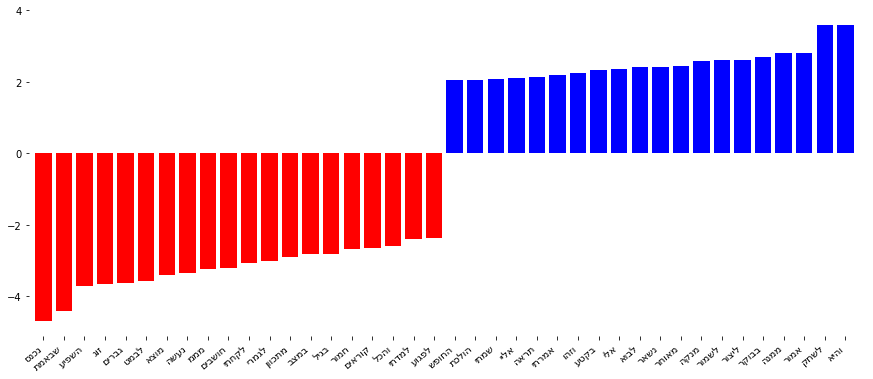

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg,

              precision    recall  f1-score   support

         0.0       0.48      0.13      0.21       165
         1.0       0.68      0.93      0.78       322

    accuracy                           0.66       487
   macro avg       0.58      0.53      0.49       487
weighted avg       0.61      0.66      0.59       487

Run model for par_type in ['client','therapist']
total data len: 2839
len train: 2129, len test: 710
['10', '12', '14', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אוי', 'אומרים', 'אומרת', 'אונס', 'אוקי', 'אוקיי', 'אחוז', 'אחותי', 'אחי', 'איזשהו', 'איזשהי']
['כזאת', 'ככ', 'כלומר', 'כלל', 'כללי', 'כמטפל', 'כשאני', 'כשאתה', 'כשהוא', 'לאו', 'לאחרונה', 'לאט', 'לאיזה', 'לאמא', 'לאנשים', 'לבדוק', 'לבוא', 'לבמט', 'לבנק', 'לבקל']
['10', 'באיזה', 'בתל', 'הקטע', 'חודשיים', 'לאיזה', 'לרצות', 'מסוים', 'עבר', 'שאף']


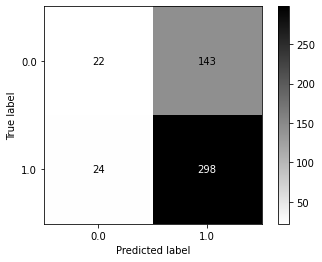

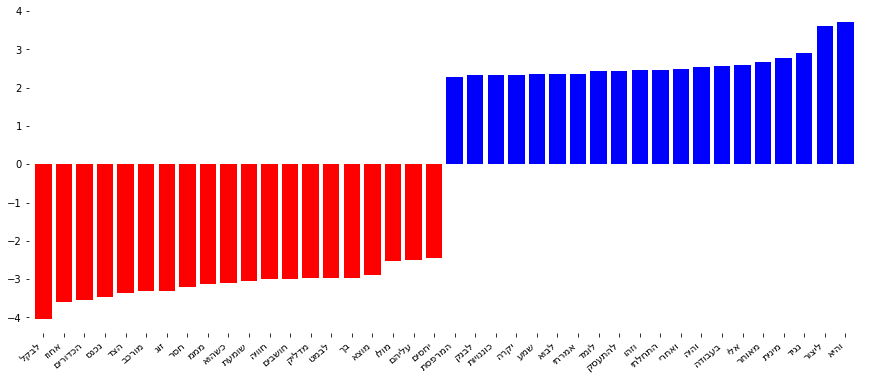

              precision    recall  f1-score   support

         0.0       0.54      0.24      0.33       285
         1.0       0.63      0.86      0.73       425

    accuracy                           0.61       710
   macro avg       0.58      0.55      0.53       710
weighted avg       0.59      0.61      0.57       710



/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


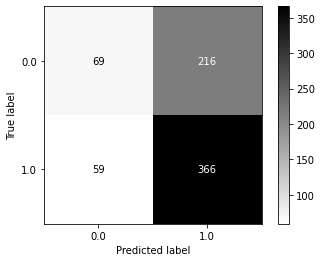

In [6]:
queries = ["par_type == 'client'",
            "par_type in ['client','therapist']"]
for q in queries:
    print("Run model for {}".format(q))
    feature_utils.run_model(sent_db.query(q))

## Embedded - fasttext for Hebrew

In [7]:
import fasttext.util
ft = fasttext.load_model('./external_src/cc.he.300.bin')

In [59]:
sent_db

,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,one_before_is_nar,two_before_is_nar
0,CLIENT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,no_mark,not_nar,0.000000,8.000000,0.000000,0.000000
1,THERAPIST,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,no_mark,not_nar,0.000000,10.000000,0.000000,0.000000
2,התחל,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,no_mark,not_nar,0.000000,5.000000,0.000000,0.000000
3,שפהעב,0.000000,3.000000,0.000000,0.000000,3.000000,3.000000,no_mark,not_nar,0.000000,6.000000,0.000000,0.000000
4,משתתפים,0.000000,4.000000,0.000000,0.000000,4.000000,4.000000,no_mark,not_nar,0.000000,8.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,ככה כמה דקות אה לא לא לא בסדר,0.000000,1355.000000,0.000000,5.000000,1294.000000,269.000000,therapist,not_nar,0.000000,30.000000,0.000000,0.000000
2939,לא לא לא בסדר יש לך את הדקות בשביל ה,0.000000,1356.000000,0.000000,5.000000,1295.000000,270.000000,client,not_nar,0.000000,37.000000,0.000000,0.000000
2940,יש לך את הדקות בשביל ה,0.000000,1357.000000,0.000000,5.000000,1296.000000,271.000000,therapist,not_nar,0.000000,23.000000,0.000000,0.000000
2941,את הזה השאלון,0.000000,1358.000000,0.000000,5.000000,1297.000000,272.000000,client,not_nar,0.000000,15.000000,0.000000,0.000000


In [9]:
#ft.get_sentence_vector(sent_db.loc[2939,'text'])

In [54]:
imp.reload(feature_utils)
sent_db = feature_utils.add_features_prev_is_nar(sent_db)
sent_db[sent_db['is_nar'] == 1].head()

,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len,one_before_is_nar,two_before_is_nar
13,הייתי לי מריבה מאוד מאוד קשה עם גי ממש ברמה ש...,0.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,57.000000,0.000000,0.000000
14,לא כמעט הוא השאיר אתמפתחות והלך,1.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,31.000000,1.000000,0.000000
15,ו זה היה ליומיים בדיוק אחרי זה הוא חזר וסידרנו...,2.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,83.000000,1.000000,1.000000
16,אין לי עבודה אני לא יודע מה קורה עם הדירה יל ל...,3.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,90.000000,1.000000,1.000000
17,הרגשתי הכי בודד בעולם,4.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,21.000000,1.000000,1.000000


In [60]:
cl_th_sent_db = sent_db.query("par_type in ['client','therapist']")

In [63]:
imp.reload(feature_utils)
X,y = feature_utils.get_label_and_drop(cl_th_sent_db)
text_train,text_test,y_train, y_test = feature_utils.get_train_test_text(X,y)

total data len: 2839
len train: 2129, len test: 710


In [64]:
train_vectors = [ft.get_sentence_vector(sent) for sent in text_train]
X_train = np.vstack(train_vectors)
X_train.shape

(2129, 300)

In [65]:
y_train.shape

(2129,)

In [66]:
test_vectors = [ft.get_sentence_vector(sent) for sent in text_test]
X_test = np.vstack(test_vectors)
X_test.shape

(710, 300)

In [67]:
y_test.shape

(710,)

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100).fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("TEST: {}".format(lr.score(X_train, y_train)))
print("TRAIN: {}".format(lr.score(X_test, y_test)))

TEST: 0.746359793330202
TRAIN: 0.6309859154929578


/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
imp.reload(feature_utils)
feature_utils.run_on_all_regerssors(X_train,y_train,"fasttex")

*********LogisticRegression *********
*********LogisticRegressionCV *********
*********PassiveAggressiveClassifier *********
*********Perceptron *********
*********RidgeClassifier *********
*********RidgeClassifierCV *********
*********SGDClassifier *********
*********SVC *********
*********DecisionTreeClassifier *********


In [70]:
display(feature_utils.scores_df.sort_values(by='f1',ascending = False))

,f1,roc_auc,recall,average_precision
LogisticRegression_fasttex,0.747314,0.638393,0.918387,0.705755
SGDClassifier_fasttex,0.743460,0.653990,0.882277,0.711689
SVC_fasttex,0.741872,0.684143,0.875990,0.766127
RidgeClassifier_fasttex,0.740725,0.650122,0.862623,0.712695
RidgeClassifierCV_fasttex,0.740725,0.650150,0.862623,0.712702
LogisticRegressionCV_fasttex,0.731486,0.659019,0.795952,0.716559
PassiveAggressiveClassifier_fasttex,0.621397,0.658757,0.678426,0.714095
DecisionTreeClassifier_fasttex,0.617582,0.544665,0.592618,0.630322
Perceptron_fasttex,0.477243,0.619129,0.475683,0.689951


## Combine sentence vectors + numeric features

In [92]:
sent_vectors = { index: ft.get_sentence_vector(row['text']) for index, row in cl_th_sent_db.iterrows()}
sent_array = np.vstack(sent_vectors.values())
sent_array.shape

<ipython-input-92-450c41b46336>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  sent_array = np.vstack(sent_vectors.values())


(2839, 300)

In [97]:
sent_vec_db = pd.DataFrame(data=sent_vectors.values(), index=sent_vectors.keys())
sent_vec_db

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
6,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,-0.028992,0.024537,-0.002414,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388
7,-0.013333,0.000648,0.013545,-0.001843,0.037912,0.044653,-0.033737,0.020353,-0.039255,0.040033,...,-0.060196,0.008632,0.038335,0.013976,-0.062025,-0.025751,-0.032749,0.038144,-0.012054,0.083821
8,-0.049959,0.006207,0.019215,-0.013564,-0.006140,-0.020194,-0.021590,0.033078,0.043775,0.076063,...,-0.006393,0.000760,-0.021449,-0.031051,-0.009857,0.012590,0.040845,-0.031004,0.001470,-0.049673
9,-0.009683,0.047087,0.037459,0.019149,0.005652,-0.042241,0.013978,0.052192,-0.023080,0.002327,...,-0.008517,0.017969,-0.029806,0.033418,-0.029150,0.014673,0.022372,0.058281,0.031803,-0.026994
10,0.060957,0.005640,-0.018319,-0.002478,0.010457,-0.024910,0.091064,0.000475,0.066396,-0.038925,...,-0.004368,0.027183,-0.024806,-0.046600,-0.026737,-0.015007,0.005086,0.030338,0.038523,-0.014919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,0.009427,0.038958,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160
2938,0.017902,0.038459,-0.016246,-0.003681,-0.026354,0.042227,0.019360,0.023875,-0.001420,0.015527,...,-0.000730,0.006619,-0.022408,0.012324,-0.014626,0.004259,0.006237,0.035307,0.027554,-0.016158
2939,0.013650,0.023375,0.017228,0.000760,0.006687,0.010800,-0.005754,0.013923,0.009729,0.018878,...,-0.006892,0.006403,-0.015082,0.006376,-0.010457,0.021521,-0.011850,0.022129,0.016181,0.004594
2940,0.009727,0.017978,0.027529,0.006578,0.020192,-0.020603,0.027635,0.017854,0.040842,0.017801,...,-0.012764,0.023296,-0.019581,-0.002811,-0.012890,0.033547,0.007128,-0.002388,0.006980,-0.007728


In [107]:
cl_th_sent_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 6 to 2941
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               2839 non-null   object 
 1   sent_idx_in_block  2839 non-null   float64
 2   block_idx          2839 non-null   float64
 3   is_nar             2839 non-null   float64
 4   doc_idx            2839 non-null   float64
 5   par_db_idx         2839 non-null   float64
 6   par_idx_in_doc     2839 non-null   float64
 7   par_type           2839 non-null   object 
 8   block_type         2839 non-null   object 
 9   nar_idx            2839 non-null   float64
 10  sent_len           2839 non-null   float64
 11  one_before_is_nar  2839 non-null   float64
 12  two_before_is_nar  2839 non-null   float64
 13  fast_vec           2839 non-null   object 
dtypes: float64(10), object(4)
memory usage: 397.2+ KB


In [126]:
merged = pd.merge(sent_vec_db,cl_th_sent_db[['is_nar','one_before_is_nar','two_before_is_nar']], left_index=True, right_index=True,validate='one_to_one')

In [127]:
merged

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,is_nar,one_before_is_nar,two_before_is_nar
6,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388,0.000000,0.000000,0.000000
7,-0.013333,0.000648,0.013545,-0.001843,0.037912,0.044653,-0.033737,0.020353,-0.039255,0.040033,...,0.013976,-0.062025,-0.025751,-0.032749,0.038144,-0.012054,0.083821,0.000000,0.000000,0.000000
8,-0.049959,0.006207,0.019215,-0.013564,-0.006140,-0.020194,-0.021590,0.033078,0.043775,0.076063,...,-0.031051,-0.009857,0.012590,0.040845,-0.031004,0.001470,-0.049673,0.000000,0.000000,0.000000
9,-0.009683,0.047087,0.037459,0.019149,0.005652,-0.042241,0.013978,0.052192,-0.023080,0.002327,...,0.033418,-0.029150,0.014673,0.022372,0.058281,0.031803,-0.026994,0.000000,0.000000,0.000000
10,0.060957,0.005640,-0.018319,-0.002478,0.010457,-0.024910,0.091064,0.000475,0.066396,-0.038925,...,-0.046600,-0.026737,-0.015007,0.005086,0.030338,0.038523,-0.014919,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160,0.000000,0.000000,0.000000
2938,0.017902,0.038459,-0.016246,-0.003681,-0.026354,0.042227,0.019360,0.023875,-0.001420,0.015527,...,0.012324,-0.014626,0.004259,0.006237,0.035307,0.027554,-0.016158,0.000000,0.000000,0.000000
2939,0.013650,0.023375,0.017228,0.000760,0.006687,0.010800,-0.005754,0.013923,0.009729,0.018878,...,0.006376,-0.010457,0.021521,-0.011850,0.022129,0.016181,0.004594,0.000000,0.000000,0.000000
2940,0.009727,0.017978,0.027529,0.006578,0.020192,-0.020603,0.027635,0.017854,0.040842,0.017801,...,-0.002811,-0.012890,0.033547,0.007128,-0.002388,0.006980,-0.007728,0.000000,0.000000,0.000000


In [128]:
merged.to_csv("sent_cl_th.merged.csv",index=False)

In [129]:
X_train,X_test,y_train,y_test = feature_utils.split_db(merged)

In [130]:
feature_utils.run_on_all_regerssors(X_train,y_train,"merged")
display(feature_utils.scores_df.sort_values(by='f1',ascending = False))

*********LogisticRegression *********
*********LogisticRegressionCV *********
*********PassiveAggressiveClassifier *********
*********Perceptron *********
*********RidgeClassifier *********
*********RidgeClassifierCV *********
*********SGDClassifier *********
*********SVC *********
*********DecisionTreeClassifier *********


,f1,roc_auc,recall,average_precision
LogisticRegression_merged,0.967767,0.975027,0.967046,0.976855
LogisticRegressionCV_merged,0.967767,0.971985,0.967046,0.974441
SVC_merged,0.967767,0.960487,0.967046,0.960725
RidgeClassifierCV_merged,0.967767,0.975859,0.967046,0.976565
RidgeClassifier_merged,0.967767,0.975859,0.967046,0.976566
SGDClassifier_merged,0.967356,0.975383,0.966265,0.975623
Perceptron_merged,0.946245,0.973573,0.940459,0.974844
PassiveAggressiveClassifier_merged,0.931700,0.973515,0.915902,0.975013
DecisionTreeClassifier_merged,0.928741,0.912727,0.923813,0.909992
LogisticRegression_fasttex,0.747314,0.638393,0.918387,0.705755


In [134]:
X_train.shape, y_train.shape, y_train.sum()

((2129, 302), (2129,), 1274.0)

In [135]:
X_test.shape, y_test.shape, y_test.sum()

((710, 302), (710,), 425.0)

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names wit

TEST: 0.9675904180366369
TRAIN: 0.967605633802817
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       285
         1.0       0.98      0.97      0.97       425

    accuracy                           0.97       710
   macro avg       0.97      0.97      0.97       710
weighted avg       0.97      0.97      0.97       710



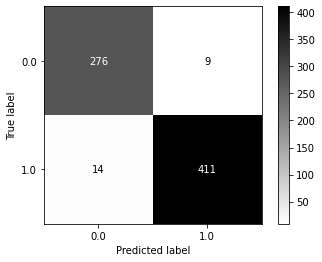

In [133]:
lr = LogisticRegression(C=100).fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("TEST: {}".format(lr.score(X_train, y_train)))
print("TRAIN: {}".format(lr.score(X_test, y_test)))
feature_utils.get_prediction_report(y_test,y_pred)

In [145]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity



nar_vectors = [sent_vectors[key] for key in sent_vectors.keys() if cl_th_sent_db.loc[key,'is_nar']==1]
not_nar_vectors = [sent_vectors[key] for key in sent_vectors.keys() if cl_th_sent_db.loc[key,'is_nar']==0] 

In [148]:
nar_vec_array = np.vstack(nar_vectors)
not_nar_vec_array = np.vstack(not_nar_vectors)
nar_vec_array.shape
nar_vec_array.shape, not_nar_vec_array.shape

((1699, 300), (1140, 300))

In [ ]:
import seaborn as sns
nar_nar_similarities =  cosine_similarity(nar_vec_array)
notNar_noNar_similarities =  cosine_similarity(not_nar_vec_array)
nar_notNar_similarities = cosine_similarity(nar_vec_array,not_nar_vec_array)

<AxesSubplot:>

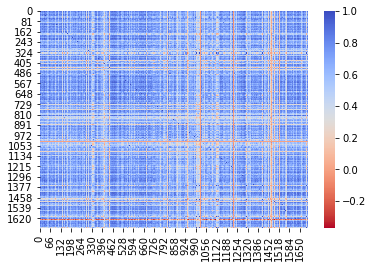

In [151]:
sns.heatmap(nar_nar_similarities, cmap='coolwarm_r')

<AxesSubplot:>

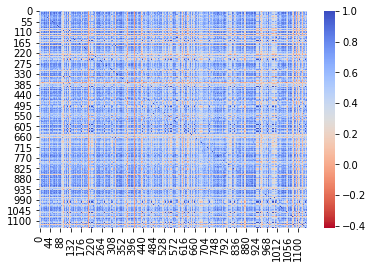

In [152]:
sns.heatmap(notNar_noNar_similarities, cmap='coolwarm_r')

<AxesSubplot:>

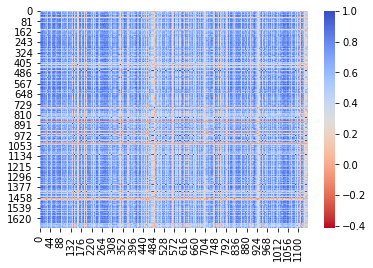

In [153]:
sns.heatmap(nar_notNar_similarities, cmap='coolwarm_r')

In [ ]:
import texthero as hero
analysis_db = pd.DataFrame()
analysis_db['fast_vec'] = sent_array.tolist()
analysis_db['tsne_fast_vec'] = hero.tsne(analysis_db['fast_vec'])

[nltk_data] Downloading package stopwords to /home/zsofya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
hero.scatterplot(analysis_db, col='tsne_fast_vec', color='convertedManaCost'
                 , title="FastTextVec", hover_data = ['name','text'])

In [ ]:


# def show_correlation_matrices(original, norma_distributed, annot=True):
#     original = move_is_fraud_to_fisrt_index(original)
#     norma_distributed= move_is_fraud_to_fisrt_index(norma_distributed)
    
#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,40))

#     sns.heatmap(original.corr(), cmap='coolwarm_r', annot_kws={'size':10},annot=annot, ax=ax1)
#     ax1.set_title("Full data", fontsize=14)

#     sns.heatmap(norma_distributed.corr(), cmap='coolwarm_r', annot_kws={'size':10},annot=annot, ax=ax2)
#     ax2.set_title("Normal distributed", fontsize=14)
#     plt.show()